In [3]:
import opendatasets as od

In [4]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [5]:
od.download(dataset_url)

Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 10.5MB/s]


In [7]:
import os
data_dir = './weather-dataset-rattle-package'

In [8]:
train_csv = data_dir + '/weatherAUS.csv'

In [9]:
import pandas as pd
raw_df = pd.read_csv(train_csv)
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [14]:
raw_df.info()
#As you can see here there are some missing values in the dataset (null value)
#It's IMPORTANT to drop missing values in the target column because then the model isn't able to train itself

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#This removes the rows where either RainToday or RainTomorrow are null (don't want null values in important columns)
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

In [18]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
#This shows location vs rain today
#Its clear that most places have rain around 20% of the time
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [22]:
px.histogram(raw_df, 
             x='RainToday', 
             color='RainTomorrow', 
             title='Rain Today vs. Rain Tmw')

#A good way to think about this graph is that if there is no rain today, then theres around a 20% chance is rains tmw
#If there is rain today, then theres about a 50 percent of it raining tmw

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
#Splitting the data into training, validation, and testing sets
train_validation_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=1) 
train_df, validation_df = train_test_split(train_validation_df, test_size=0.25, random_state=1)

#The random state ensures you use the same rows for each group every time (a new random state would create a new random split)



In [28]:
print('training shape: ', train_df.shape)
print('validation shape: ', validation_df.shape)
print('testing shape: ', test_df.shape)




training shape:  (84471, 23)
validation shape:  (28158, 23)
testing shape:  (28158, 23)


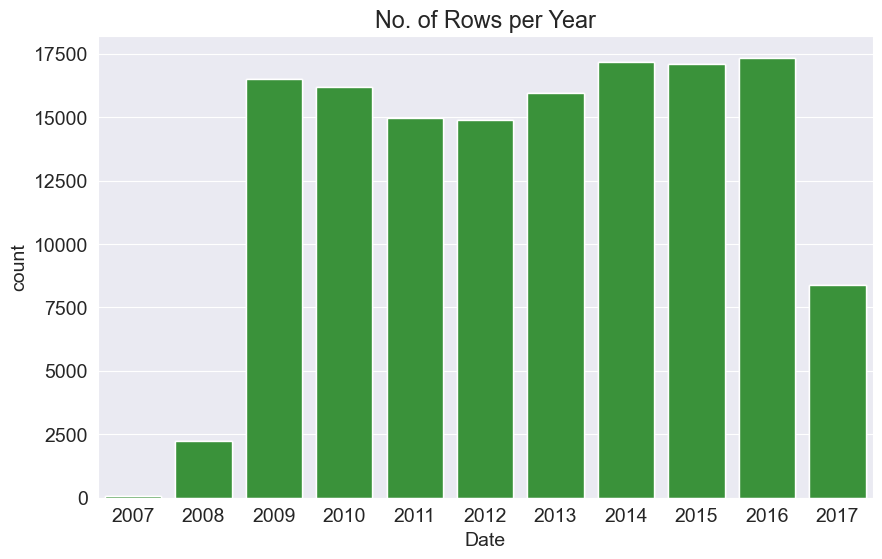

In [31]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)
plt.show()

In [32]:
#For time series data, the training set should contain the oldest data so you can effectively use the past to measure the future

year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
validation_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]


In [34]:
print('train_df.shape :', train_df.shape)
print('validation_df.shape :', validation_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
validation_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [37]:
#Important to identify input and output columns

input_cols = list(train_df.columns)[1:-1] #Gets columns 1 (0 indexed) to 2nd to last col
target = 'RainTomorrow'
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [39]:
#Creates copies of the training data as we are about to do some one-hot and other modifications to the training set

training_inputs = train_df[input_cols].copy()
training_target = train_df[target].copy()
validation_inputs = validation_df[input_cols].copy()
validation_target = validation_df[target].copy()
test_inputs = test_df[input_cols].copy()
test_target = test_df[target].copy()

In [41]:
import numpy as np  

#Creates a list of numeric columns and categorical columns
numeric_cols = training_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = training_inputs.select_dtypes('object').columns.tolist()

Imputer- dealing with the Nan values in your dataset. We will take the average of the column and replace the Nan value with that average

In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')


In [44]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [46]:
#The imputer now has the average of each column (numeric columns only)

imputer.fit(raw_df[numeric_cols])
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

In [48]:
#Now you actually replace the values of Nan using the transform method from imputer
training_inputs[numeric_cols] = imputer.transform(training_inputs[numeric_cols])
validation_inputs[numeric_cols] = imputer.transform(validation_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [50]:
training_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [53]:
#Now we are going to normalize the data to where each value is between 0 and 1 for all columns (eliminates scaling issues)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

In [56]:
#Now just change all the values to be between 0 and 1
training_inputs[numeric_cols] = scaler.transform(training_inputs[numeric_cols])
validation_inputs[numeric_cols] = scaler.transform(validation_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

training_inputs

Location   MinTemp   MaxTemp      Rainfall  Evaporation  Sunshine  \
0        Albury  0.205487  0.092640  1.174977e-08     0.000002  0.002503   
1        Albury  0.205408  0.092654  0.000000e+00     0.000002  0.002503   
2        Albury  0.205481  0.092659  0.000000e+00     0.000002  0.002503   
3        Albury  0.205432  0.092674  0.000000e+00     0.000002  0.002503   
4        Albury  0.205541  0.092703  1.958296e-08     0.000002  0.002503   
...         ...       ...       ...           ...          ...       ...   
144548    Uluru  0.205533  0.092709  0.000000e+00     0.000002  0.002503   
144549    Uluru  0.205509  0.092734  0.000000e+00     0.000002  0.002503   
144550    Uluru  0.205538  0.092740  0.000000e+00     0.000002  0.002503   
144551    Uluru  0.205575  0.092745  0.000000e+00     0.000002  0.002503   
144552    Uluru  0.205606  0.092752  0.000000e+00     0.000002  0.002503   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W      -0.046854          W        WNW  ...      0.000036   
1              WNW      -0.046854        NNW        WSW  ...      0.000033   
2              WSW      -0.046854          W        WSW  ...      0.000039   
3               NE      -0.046864         SE          E  ...      0.000014   
4                W      -0.046856        ENE         NW  ...      0.000030   
...            ...            ...        ...        ...  ...           ...   
144548         SSE      -0.046855        ESE        SSE  ...      0.000039   
144549          NE      -0.046861        ENE         SW  ...      0.000030   
144550         ESE      -0.046857        ESE        SSE  ...      0.000014   
144551         ESE      -0.046855        ESE        SSW  ...      0.000026   
144552         WNW      -0.046840        ENE        SSW  ...      0.000020   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          0.000071     0.000022   -16.474367   -15.883615  0.010974   
1          0.000044     0.000025   -16.474354   -15.883612  0.006078   
2          0.000038     0.000030   -16.474367   -15.883608  0.006078   
3          0.000045     0.000016   -16.474322   -15.883591  0.006078   
4          0.000082     0.000033   -16.474353   -15.883619  0.009602   
...             ...          ...          ...          ...       ...   
144548     0.000022     0.000013   -16.474338   -15.883604  0.006078   
144549     0.000016     0.000008   -16.474344   -15.883613  0.006078   
144550     0.000015     0.000008   -16.474348   -15.883611  0.006078   
144551     0.000022     0.000009   -16.474338   -15.883606  0.006078   
144552     0.000016     0.000009   -16.474347   -15.883618  0.006078   

        Cloud3pm   Temp9am   Temp3pm  RainToday  
0       0.006172  0.155330  0.105829         No  
1       0.006172  0.155332  0.105846         No  
2       0.002743  0.155368  0.105838         No  
3       0.006172  0.155341  0.105862         No  
4       0.010974  0.155338  0.105884         No  
...          ...       ...       ...        ...  
144548  0.006172  0.155393  0.105899         No  
144549  0.006172  0.155442  0.105920         No  
144550  0.006172  0.155450  0.105927         No  
144551  0.006172  0.155451  0.105937         No  
144552  0.006172  0.155454  0.105939         No  

[97988 rows x 21 columns]

In [58]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [62]:

#Just one hot encoding all the categorical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoder.fit(raw_df[categorical_cols])


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [63]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [64]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [66]:
training_inputs[encoded_cols] = encoder.transform(training_inputs[categorical_cols])
validation_inputs[encoded_cols] = encoder.transform(validation_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [67]:
test_inputs

Location   MinTemp   MaxTemp      Rainfall  Evaporation  Sunshine  \
2498     Albury  0.205579  0.092739  0.000000e+00     0.000002  0.002503   
2499     Albury  0.205586  0.092712  7.833183e-09     0.000002  0.002503   
2500     Albury  0.205553  0.092641  4.308251e-08     0.000002  0.002503   
2501     Albury  0.205538  0.092645  3.054941e-07     0.000002  0.002503   
2502     Albury  0.205515  0.092640  1.331641e-07     0.000002  0.002503   
...         ...       ...       ...           ...          ...       ...   
145454    Uluru  0.205357  0.092632  0.000000e+00     0.000002  0.002503   
145455    Uluru  0.205348  0.092643  0.000000e+00     0.000002  0.002503   
145456    Uluru  0.205359  0.092656  0.000000e+00     0.000002  0.002503   
145457    Uluru  0.205382  0.092667  0.000000e+00     0.000002  0.002503   
145458    Uluru  0.205414  0.092667  0.000000e+00     0.000002  0.002503   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
2498           ENE      -0.046850        NaN        ESE  ...            0.0   
2499           SSE      -0.046852        SSE         SE  ...            1.0   
2500           ENE      -0.046853        ESE        ENE  ...            0.0   
2501           SSE      -0.046857         SE        SSE  ...            0.0   
2502           ENE      -0.046861         SE        SSE  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
145454           E      -0.046861        ESE          E  ...            0.0   
145455           E      -0.046861         SE        ENE  ...            0.0   
145456         NNW      -0.046865         SE          N  ...            0.0   
145457           N      -0.046858         SE        WNW  ...            0.0   
145458          SE      -0.046862        SSE          N  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
2498               0.0             0.0            0.0           0.0   
2499               0.0             0.0            0.0           0.0   
2500               0.0             0.0            0.0           0.0   
2501               1.0             0.0            0.0           0.0   
2502               1.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
145454             0.0             0.0            0.0           0.0   
145455             0.0             0.0            0.0           0.0   
145456             0.0             0.0            0.0           0.0   
145457             0.0             0.0            0.0           0.0   
145458             0.0             0.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
2498               0.0             0.0             0.0           1.0   
2499               0.0             0.0             0.0           1.0   
2500               0.0             0.0             0.0           0.0   
2501               0.0             0.0             0.0           0.0   
2502               0.0             0.0             0.0           0.0   
...                ...             ...             ...           ...   
145454             0.0             0.0             0.0           1.0   
145455             0.0             0.0             0.0           1.0   
145456             0.0             0.0             0.0           1.0   
145457             1.0             0.0             0.0           1.0   
145458             0.0             0.0             0.0           1.0   

        RainToday_Yes  
2498              0.0  
2499              0.0  
2500              1.0  
2501              1.0  
2502              1.0  
...               ...  
145454            0.0  
145455            0.0  
145456            0.0  
145457            0.0  
145458            0.0  

[25710 rows x 123 columns]